## Problem 1

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from six.moves import cPickle

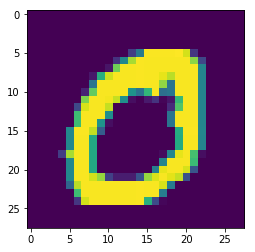

In [2]:
data = cPickle.load(open('./data.pkl', 'rb'))

data0 = data['0']
data1 = data['1']

img = data0[4]

plt.imshow(img)

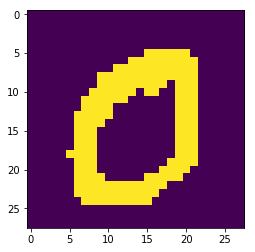

In [3]:
# Convert to binary image
data0 = data0 > 125
data1 = data1 > 125

img = data0[4]

plt.imshow(img)

In [4]:
# Average pixels locaed at the center of the image
feature0_1 = np.sum(data0[:,10:20,10:20], axis=(1, 2)).reshape(-1, 1)/100
feature1_1 = np.sum(data1[:,10:20,10:20], axis=(1, 2)).reshape(-1, 1)/100

print(feature0_1.shape); print(feature1_1.shape)

(1000, 1)
(1000, 1)


In [5]:
# Total average pixels over the entire location
feature0_2 = np.sum(data0, axis=(1, 2)).reshape(-1, 1)/(28*28)
feature1_2 = np.sum(data1, axis=(1, 2)).reshape(-1, 1)/(28*28)

print(feature0_2.shape); print(feature1_2.shape)

(1000, 1)
(1000, 1)


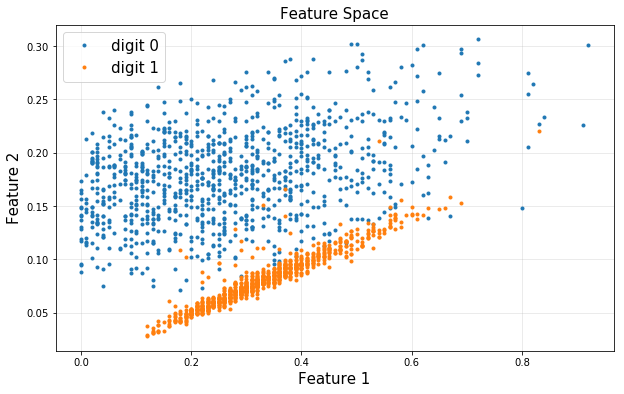

In [6]:
plt.figure(figsize=(10, 6))
plt.title('Feature Space', fontsize=15)
plt.plot(feature0_1, feature0_2, '.', label='digit 0')
plt.plot(feature1_1, feature1_2, '.', label='digit 1')
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.show()

We would like to use the SVM to classify digit 0 and digit 1 in the training set instead of the perceptron.

### Step1. Define variables

In [7]:
X1 = np.hstack([np.ones([feature0_1.shape[0],1]), feature0_1,feature0_2])
X2 = np.hstack([np.ones([feature1_1.shape[0],1]), feature1_1, feature1_2])

print(X1.shape); print(X2.shape)
print(X1)

(1000, 3)
(1000, 3)
[[ 1.          0.17        0.15943878]
 [ 1.          0.23        0.16964286]
 [ 1.          0.63        0.17729592]
 ..., 
 [ 1.          0.34        0.16454082]
 [ 1.          0.57        0.24744898]
 [ 1.          0.04        0.14030612]]


In [8]:
X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

N = X1.shape[0] # 1000
M = X2.shape[0] # 1000

m = N + M # 2000

In [9]:
"""
X = np.vstack([X1, X2])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

print(X.shape); print(X)
print(y.shape); print(y)
"""

'\nX = np.vstack([X1, X2])\ny = np.vstack([np.ones([N,1]), -np.ones([M,1])])\n\nprint(X.shape); print(X)\nprint(y.shape); print(y)\n'

### Step2. CVXPY

In [10]:
import cvxpy as cvx

g = 1
w = cvx.Variable(3,1)
u = cvx.Variable(N,1)
v = cvx.Variable(M,1)
obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones((1,N))*u + np.ones((1,M))*v))
const = [X1*w >= 1-u, X2*w <= -(1-v), u >= 0, v >= 0 ]
prob = cvx.Problem(obj, const).solve()

w = w.value
w

matrix([[ -2.20668059],
        [ -9.6033403 ],
        [ 49.10229647]])

In [11]:
"""
g = 1
w = cvx.Variable(3,1)
d = cvx.Variable(m,1)
obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones([1,m])*d))
const = [cvx.mul_elemwise(y, X*w) >= 1-d, d >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value
w
"""

'\ng = 1\nw = cvx.Variable(3,1)\nd = cvx.Variable(m,1)\nobj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones([1,m])*d))\nconst = [cvx.mul_elemwise(y, X*w) >= 1-d, d >= 0]\nprob = cvx.Problem(obj, const).solve()\n\nw = w.value\nw\n'

### Step3. Plot the result

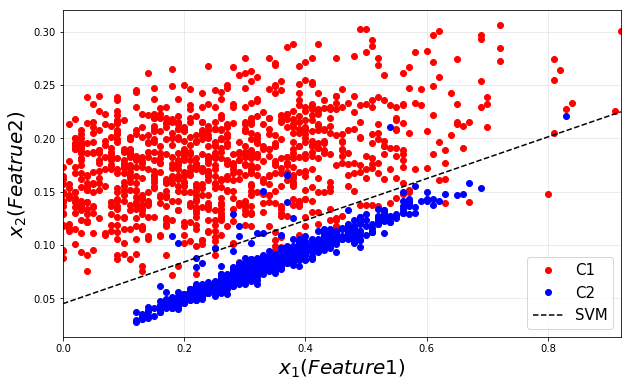

In [12]:
max_limit = max(max(feature0_1),max(feature1_1))

xp = np.linspace(0,max_limit,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='SVM')
#plt.plot(xp, yp-1/w[2,0], '-k')
#plt.plot(xp, yp+1/w[2,0], '-k')
plt.xlim([0,max_limit])
plt.grid(alpha=0.3)
plt.xlabel('$x_1(Feature1)$', fontsize = 20)
plt.ylabel('$x_2(Featrue2)$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

## Problem3

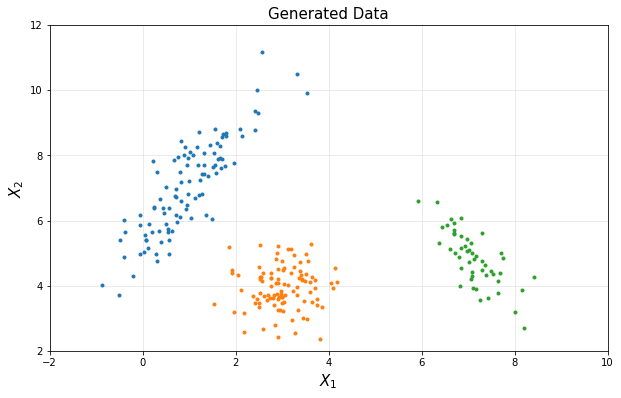

In [13]:
import numpy as np
import matplotlib.pyplot as plt

## generate three simulated clusters

mu1 = np.array([1, 7])
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)

mu2 = np.array([3, 4])
SIGMA2 = 0.3*np.array([[1, 0],
                       [0, 1]])
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)

mu3 = np.array([7, 5])
SIGMA3 = 0.3*np.array([[1, -1],
                       [-1, 2]])
X3 = np.random.multivariate_normal(mu3, SIGMA3, 50)

plt.figure(figsize=(10, 6))
plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
plt.show()

One vs. All for Multiclass

(100, 1)


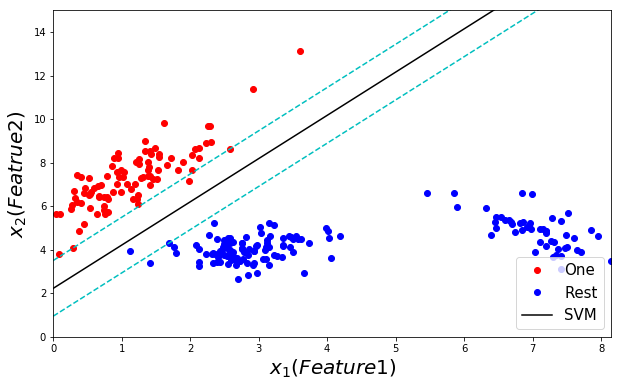

(100, 1)


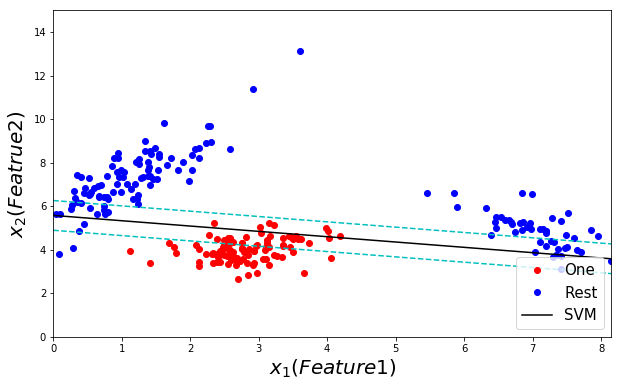

(100, 1)


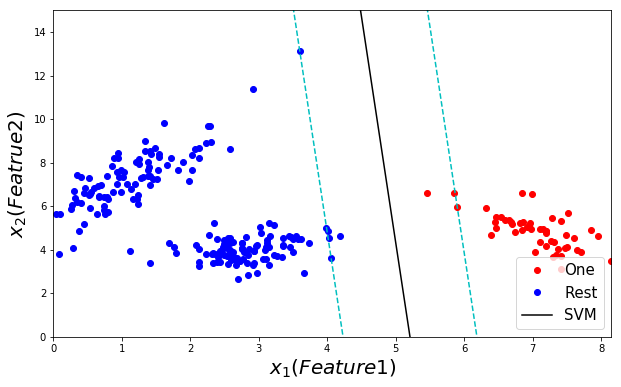

In [19]:
multiclass = [X1, X2, X3]
output = []

for i in range(len(multiclass)):
    target_one = multiclass[i]
    size_one = target_one.shape[0]
    target = np.hstack([np.ones([size_one,1]), target_one[:,0].reshape(-1,1), target_one[:,1].reshape(-1,1)])
    target_rest_list = []
    
    for j in range(len(multiclass)):
        if j != i:
            target_rest_list.append(multiclass[j])
    
    target_rest = np.concatenate(target_rest_list, axis = 0)
    size_rest = target_rest.shape[0]
    rest = np.hstack([np.ones([size_rest,1]), target_rest[:,0].reshape(-1,1), target_rest[:,1].reshape(-1,1)])
    
    X_1 = np.asmatrix(target)
    X_2 = np.asmatrix(rest)
    
    N = X_1.shape[0]
    M = X_2.shape[0]
    m = N + M
    
    # Run CVXPY for opt.
    g = 1
    w = cvx.Variable(3,1)
    u = cvx.Variable(N,1)
    v = cvx.Variable(M,1)
    obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones((1,N))*u + np.ones((1,M))*v))
    const = [X_1*w >= 1-u, X_2*w <= -(1-v), u >= 0, v >= 0 ]
    prob = cvx.Problem(obj, const).solve()

    w = w.value
    
    max_limit = max(X_1[:,1].max(),X_2[:,1].max())

    xp = np.linspace(0,max_limit,100).reshape(-1,1)
    yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]
    
    print(yp.shape)
    output.append(yp)

    plt.figure(figsize=(10, 6))
    plt.plot(X_1[:,1], X_1[:,2], 'ro', label='One')
    plt.plot(X_2[:,1], X_2[:,2], 'bo', label='Rest')
    plt.plot(xp, yp, '-k', label='SVM')
    plt.plot(xp, yp-1/w[2,0], '--c')
    plt.plot(xp, yp+1/w[2,0], '--c')
    plt.xlim([0,max_limit])
    plt.ylim([0,15])
    plt.xlabel('$x_1(Feature1)$', fontsize = 20)
    plt.ylabel('$x_2(Featrue2)$', fontsize = 20)
    plt.legend(loc = 4, fontsize = 15)
    plt.show()

In [15]:
final_output = np.concatenate(output, axis = 1)

bestclass = np.argmax(output, axis = 1)

print(final_output.shape); print(bestclass)

(100, 3)
[[99]
 [ 0]
 [ 0]]


Question: How does it decide best class above problem?

## Problem4

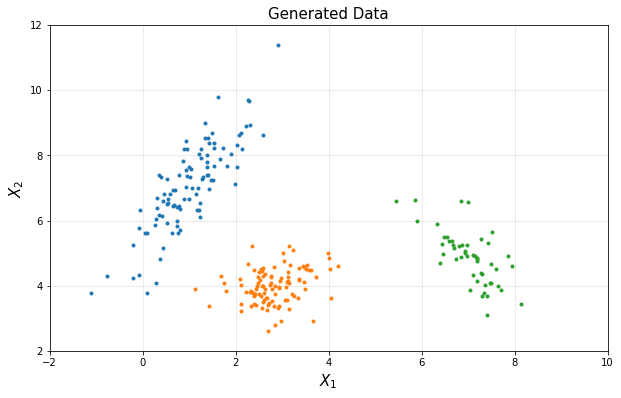

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## generate three simulated clusters

mu1 = np.array([1, 7])
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)

mu2 = np.array([3, 4])
SIGMA2 = 0.3*np.array([[1, 0],
                       [0, 1]])
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)

mu3 = np.array([7, 5])
SIGMA3 = 0.3*np.array([[1, -1],
                       [-1, 2]])
X3 = np.random.multivariate_normal(mu3, SIGMA3, 50)

plt.figure(figsize=(10, 6))
plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
plt.show()

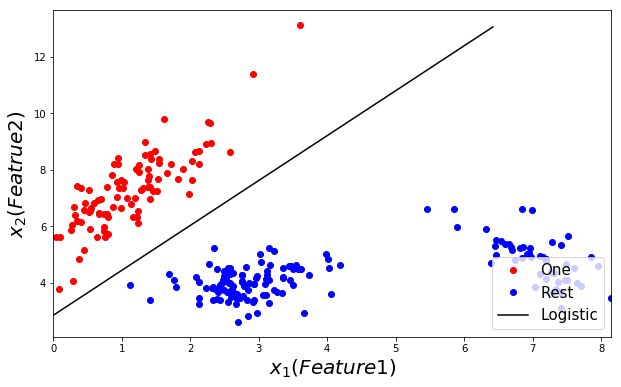

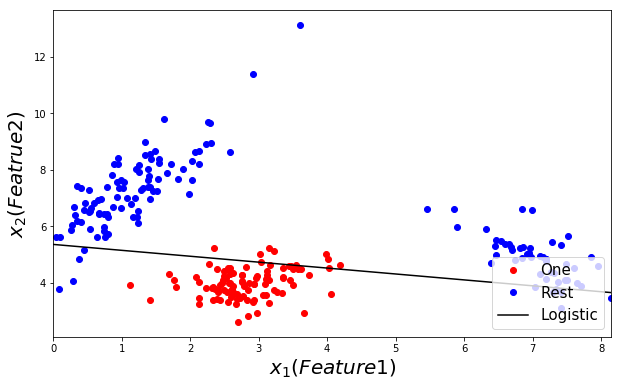

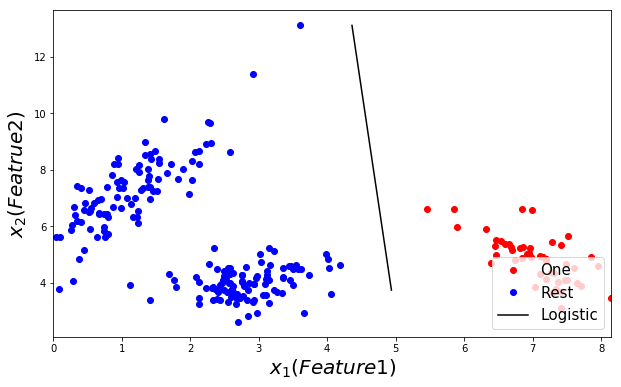

In [17]:
multiclass = [X1, X2, X3]
output = []

for i in range(len(multiclass)):
    target_one = multiclass[i]
    size_one = target_one.shape[0]
    target = np.hstack([np.ones([size_one,1]), target_one[:,0].reshape(-1,1), target_one[:,1].reshape(-1,1)])
    target_rest_list = []
    
    for j in range(len(multiclass)):
        if j != i:
            target_rest_list.append(multiclass[j])
    
    target_rest = np.concatenate(target_rest_list, axis = 0)
    size_rest = target_rest.shape[0]
    rest = np.hstack([np.ones([size_rest,1]), target_rest[:,0].reshape(-1,1), target_rest[:,1].reshape(-1,1)])
    
    X_1 = np.asmatrix(target)
    X_2 = np.asmatrix(rest)
    
    N = X_1.shape[0]
    M = X_2.shape[0]
    m = N + M
    
    X = np.vstack([X_1, X_2])
    y = np.vstack([np.ones([N,1]), -np.ones([M,1])])
    
    # Run CVXPY for opt.
    w = cvx.Variable(3, 1)

    #obj = cvx.Maximize(y.T*X*w - cvx.sum_entries(cvx.logistic(X*w)))
    obj = cvx.Minimize(cvx.sum_entries(cvx.logistic(-cvx.mul_elemwise(y,X*w))))
    prob = cvx.Problem(obj).solve()

    w = w.value
    
    max_limit = max(X_1[:,1].max(),X_2[:,1].max())

    xp = np.linspace(0,max_limit,100).reshape(-1,1)
    yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]
    
    # 이거 왜 해줘야 그래프가 나오지?? 
    ymax = max(X_1[:,2].max(),X_2[:,2].max())
    ymin = min(X_1[:,2].min(),X_2[:,2].min())
    xpyp = np.array([np.array([x,y]) for x,y in zip(xp.reshape(-1,),yp.reshape(-1,)) if y<=ymax and y>= ymin])
    xp = xpyp[:,0]
    yp = xpyp[:,1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(X_1[:,1], X_1[:,2], 'ro', label='One')
    plt.plot(X_2[:,1], X_2[:,2], 'bo', label='Rest')
    plt.plot(xp, yp, '-k', label='Logistic')
    #plt.plot(xp, yp-1/w[2,0], '--c')
    #plt.plot(xp, yp+1/w[2,0], '--c')
    plt.xlim([0,max_limit])
    plt.xlabel('$x_1(Feature1)$', fontsize = 20)
    plt.ylabel('$x_2(Featrue2)$', fontsize = 20)
    plt.legend(loc = 4, fontsize = 15)
    plt.show()